<a href="https://colab.research.google.com/github/XavierCarrera/platzi-master-ml-exercises/blob/main/Boston_Housing_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction and Problem Definition

[EN]

In this dataset, we have housing info from Boston. Each of the cases represent a household and is described by 14 variables, in which the last one (MEDV) is the median property value in the according neighborhood. The latter is our target variable.

Given that we intend to predict a numeric value, we'll use linear regression. For this exercise, we'll set an 80-90% prediction score as our goal.

For further info on how to use Linear Regression, best practices and when to use this algorithm, consult the official documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


[ES]

En este dataset , vamos a usar información de vivienda de Boston. Cada uno de los casos representa una casa y está descrita por 14 variables, en la que la última (MEDV) es el valor promedio de la propiedad en dicho vecindario. Esta es nuestra variable objetivo.

Debido a que intentamos predecir un valor numérico, usaremos regresión linear. Para este ejercicio, pondremos un 80-90% de score predictivo como nuestro objetivo.

Para mayor información sobre Regresión Lineal, mejores prácticas y cuando usar este algoritmo, consulta la documentación oficial: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/db/Boston_Housing.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


 [EN]

 Variables in order:

*  CRIM:     per capita crime rate by town
* ZN:       proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS:    proportion of non-retail business acres per town
* CHAS:     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX:      nitric oxides concentration (parts per 10 million)
* RM:       average number of rooms per dwelling
* AGE:      proportion of owner-occupied units built prior to 1940
* DIS:      weighted distances to five Boston employment centres
* RAD:      index of accessibility to radial highways
* TAX:      full-value property-tax rate per $10,000
* PTRATIO:  pupil-teacher ratio by town
* B:        1000(Bk - 0.63)^2 where Bk is the proportion of AfroAmericans by town
* LSTAT:    % lower status of the population
* MEDV: Median monetary value of owner-occupied homes in 1000s

[ES]

Variables en orden

*  CRIM:     crimen per capita local
* ZN:       proporción de zonas residenciales cada 25,000 sq.ft.
* INDUS:    proporción de negocios locales de retail 
* CHAS:     Variable dummy del Río Charles River (= 1 si el terreno limta con el río; 0 otro)
* NOX:      concentración de óxido nítrico (partes por 10 milliones)
* RM:       número de cuartos promedio por vivienda
* AGE:      proporción de unidades ocupadas por dueños construidas despues de 1940
* DIS:      pesos de distancia hacia cinco centros de empleo en Boston
* RAD:      índice de accesibilidad a carreteras radiales
* TAX:      valor entero de la tasa impositiva a la propiedad por $10,000
* PTRATIO:  tasa estudiante-maestro local
* B:        1000(Bk - 0.63)^2 en donde Bk es la proporción local de afroamericanos 
* LSTAT:    % tasa de población de escasos recursos
* MEDV: Valor monetario medio de csas ocupados por dueños (en 1000s)

[EN]

Before starting the analysis, we verify any null value.

[ES]

Antes de comenzar el análisis, verificamos si hay algún valor nulo.

In [ ]:
df.isnull().sum().sum()

0

# Exploratory Data Analysis

[EN]

For the EDA process, we're going to focus on looking for obvious patterns that might exist among our features. Therefore, the following charts and plots will provide us an insight of the remaining features.

[ES]

Para el análisis exploratorio de datos, nos enfocaremos en buscar patrones obvios que existan entre nuestros features. Por consiguiente, las siguientes tablas y gráficas nos darán una perspectiva sobre las features restantes.

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


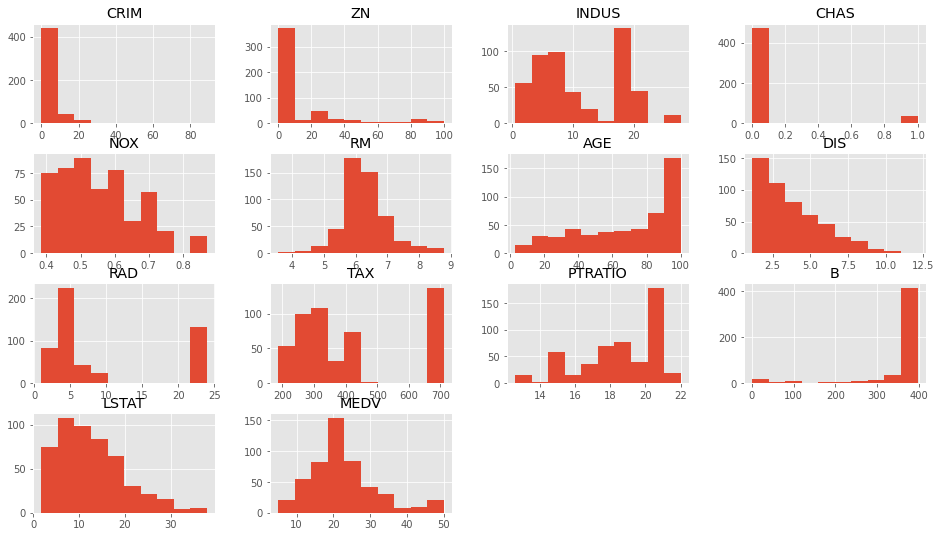

In [ ]:
df.hist()
plt.show()

<function matplotlib.pyplot.show>

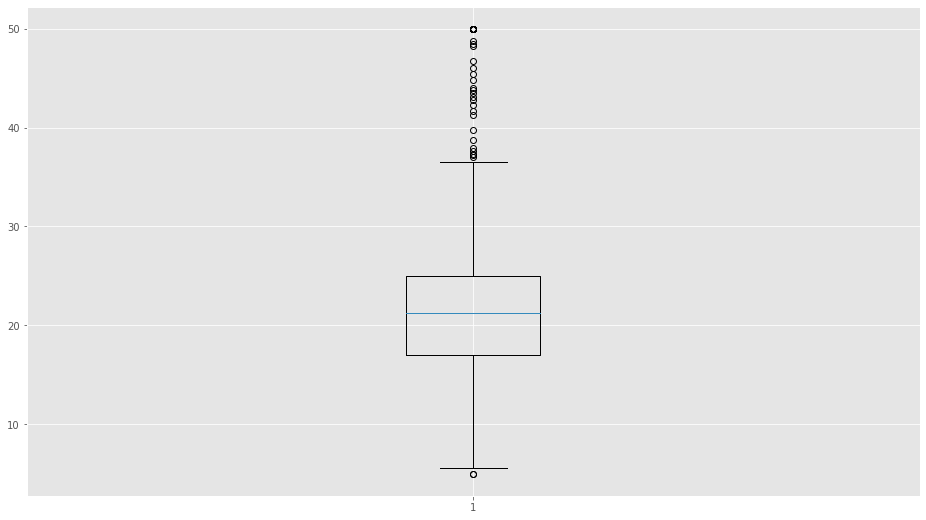

In [ ]:
plt.boxplot(df["MEDV"])
plt.show

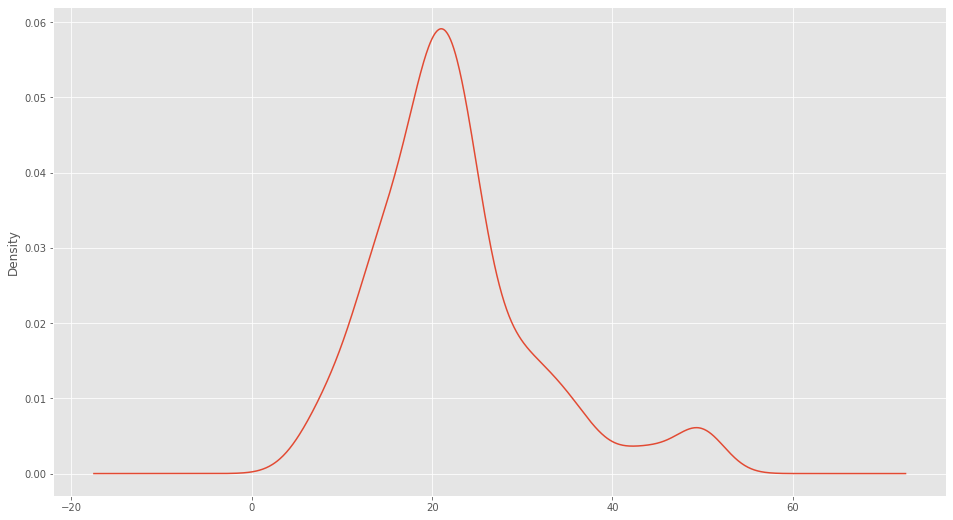

In [ ]:
s = pd.Series(df["MEDV"])
ax = s.plot.kde()

[EN]

The boxplot and the distribution curve show us that there are a number of significant outliers. We'll look deeper into them later on in order to see how it affects our regression algorithm

[ES]

El diagrama de caja y la curva de distribución nos muestra que hay un número importante de outliers. Profundizaremos en ellos después para ver como afectan nuetro algoritmo de regresión.

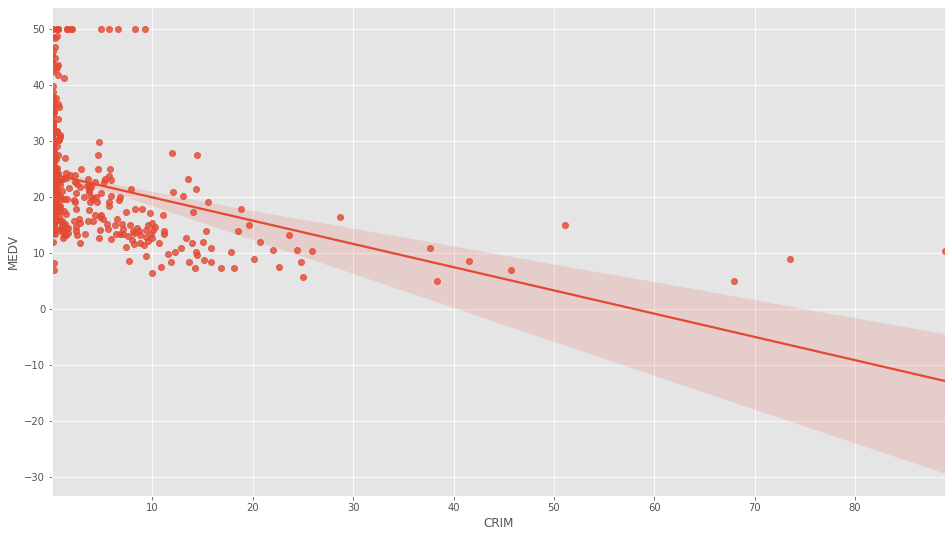

In [ ]:
sns.regplot(x=df["CRIM"], y=df["MEDV"])

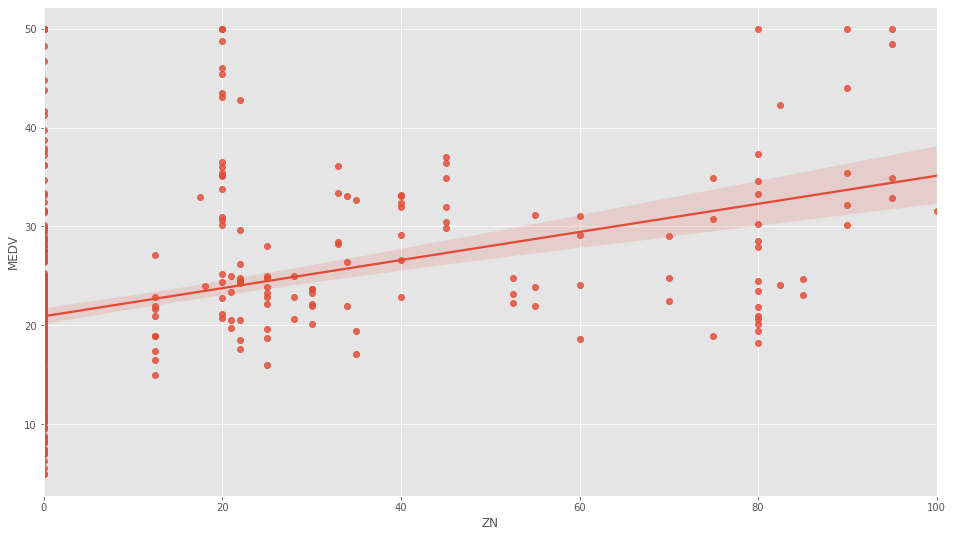

In [ ]:
sns.regplot(x=df["ZN"], y=df["MEDV"])

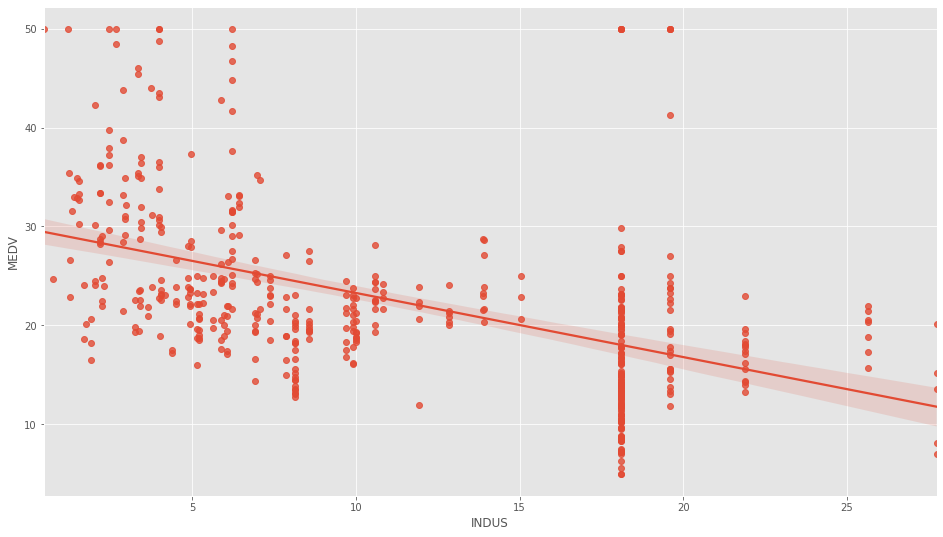

In [ ]:
sns.regplot(x=df["INDUS"], y=df["MEDV"])

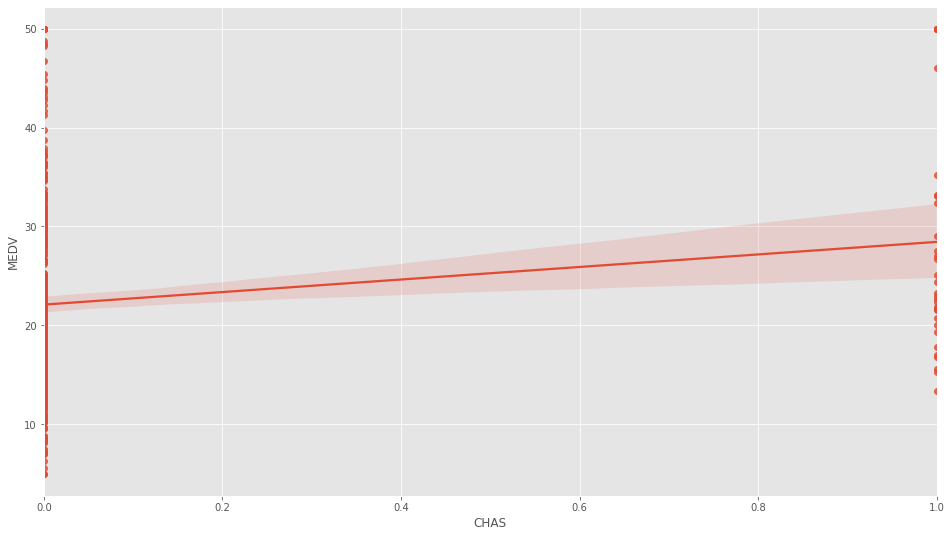

In [ ]:
sns.regplot(x=df["CHAS"], y=df["MEDV"])

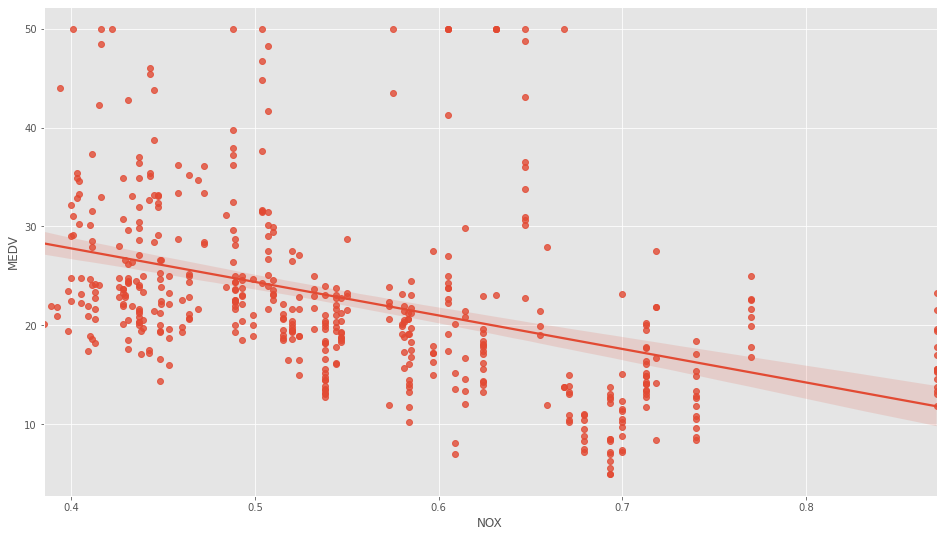

In [ ]:
sns.regplot(x=df["NOX"], y=df["MEDV"])

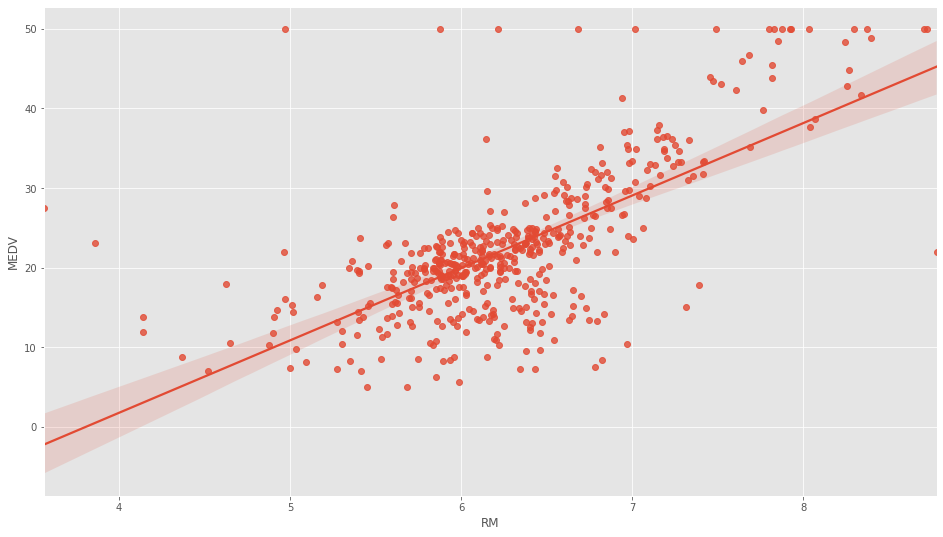

In [ ]:
sns.regplot(x=df["RM"], y=df["MEDV"])

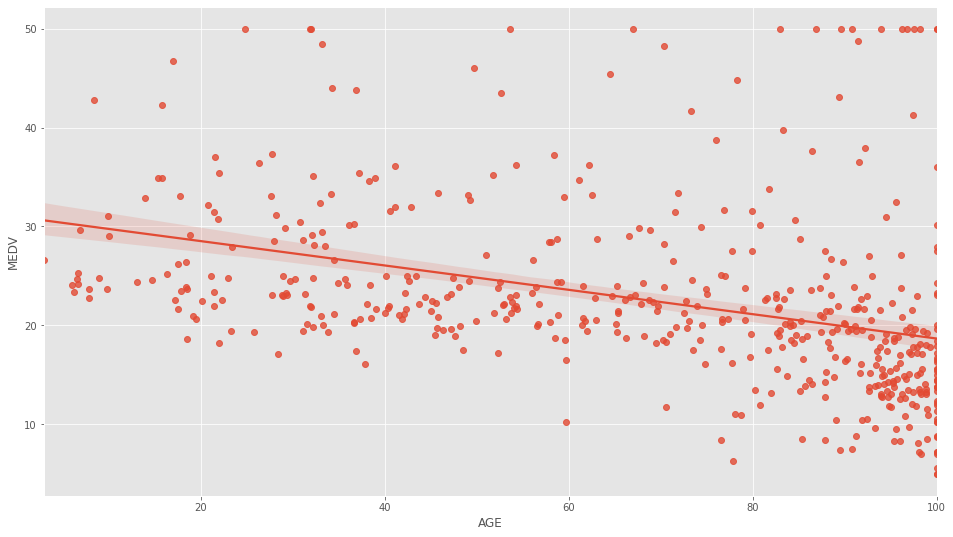

In [ ]:
sns.regplot(x=df["AGE"], y=df["MEDV"])

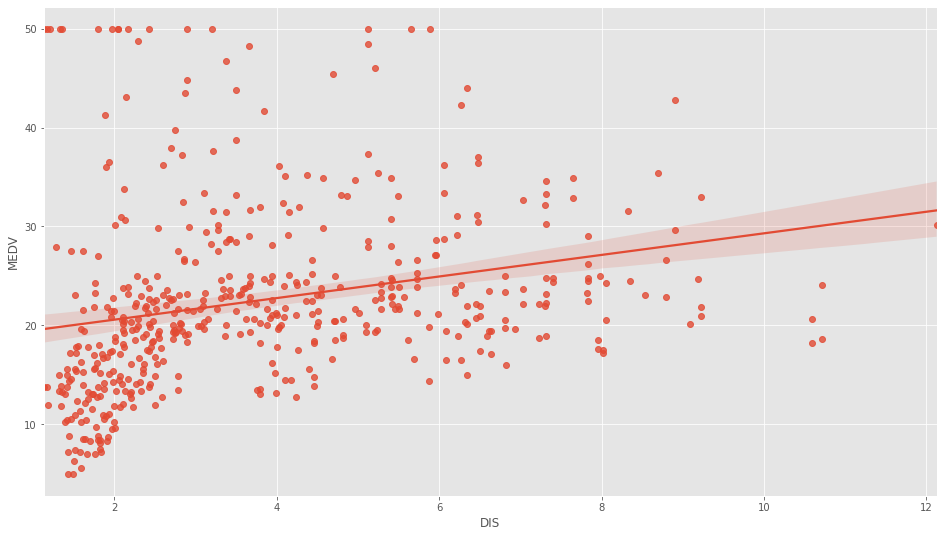

In [ ]:
sns.regplot(x=df["DIS"], y=df["MEDV"])

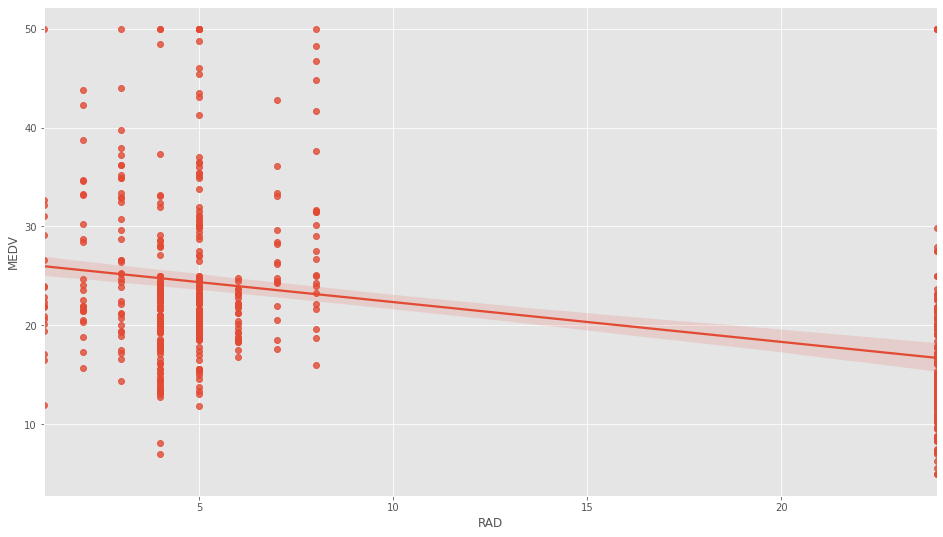

In [ ]:
sns.regplot(x=df["RAD"], y=df["MEDV"])

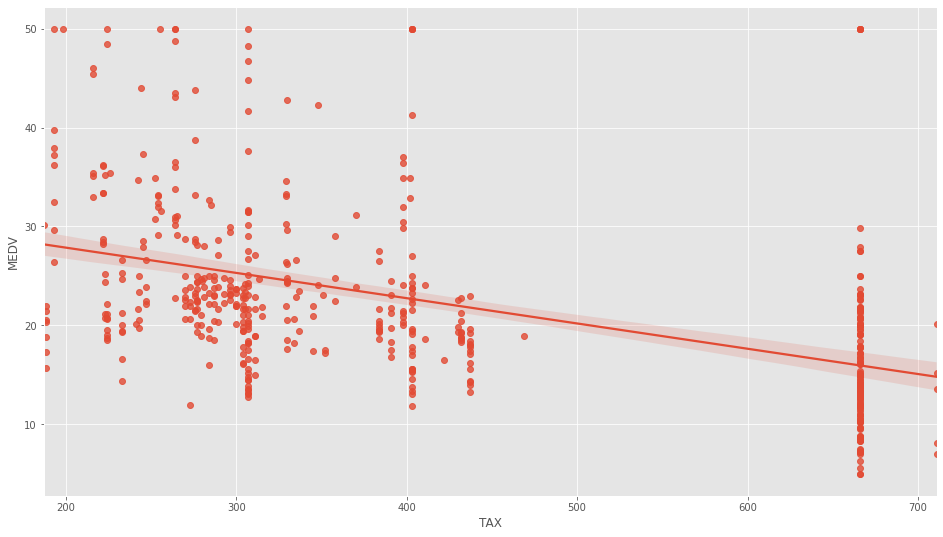

In [ ]:
sns.regplot(x=df["TAX"], y=df["MEDV"])

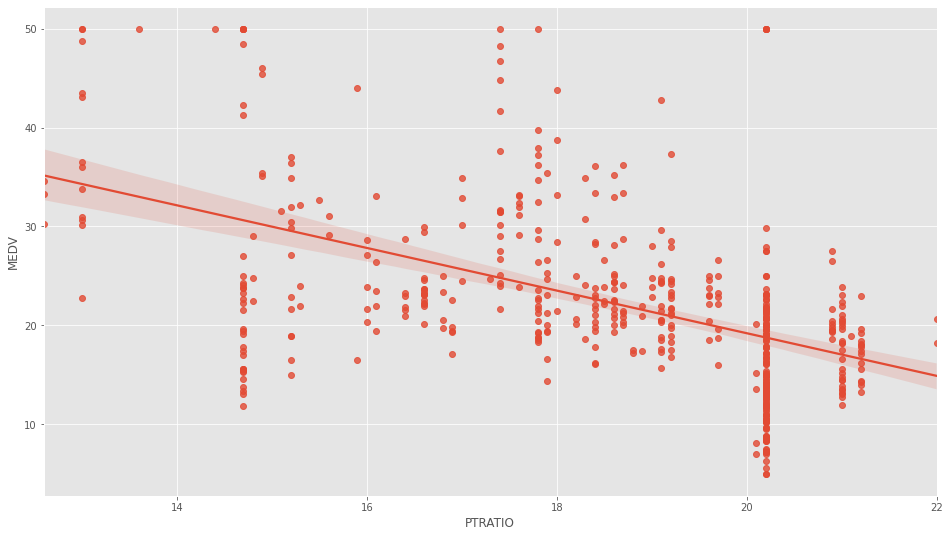

In [ ]:
sns.regplot(x=df["PTRATIO"], y=df["MEDV"])

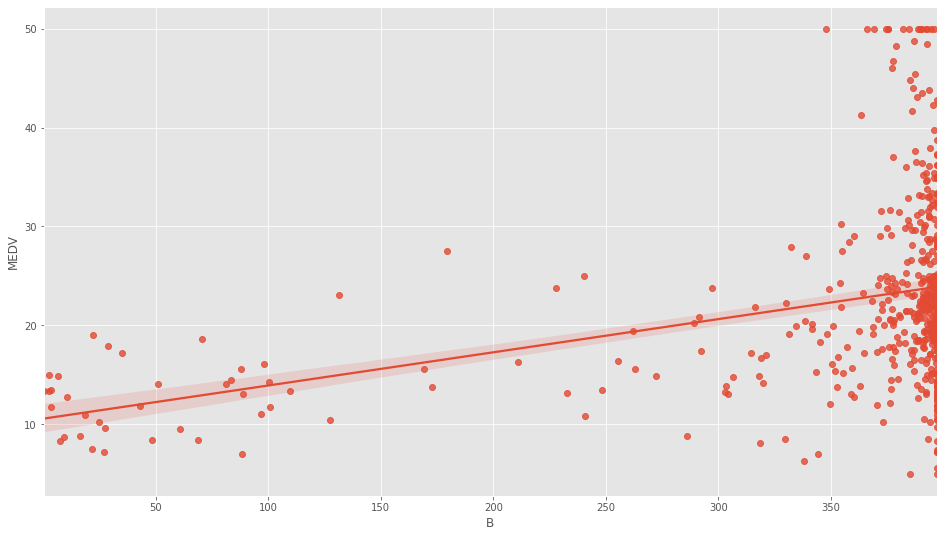

In [ ]:
sns.regplot(x=df["B"], y=df["MEDV"])

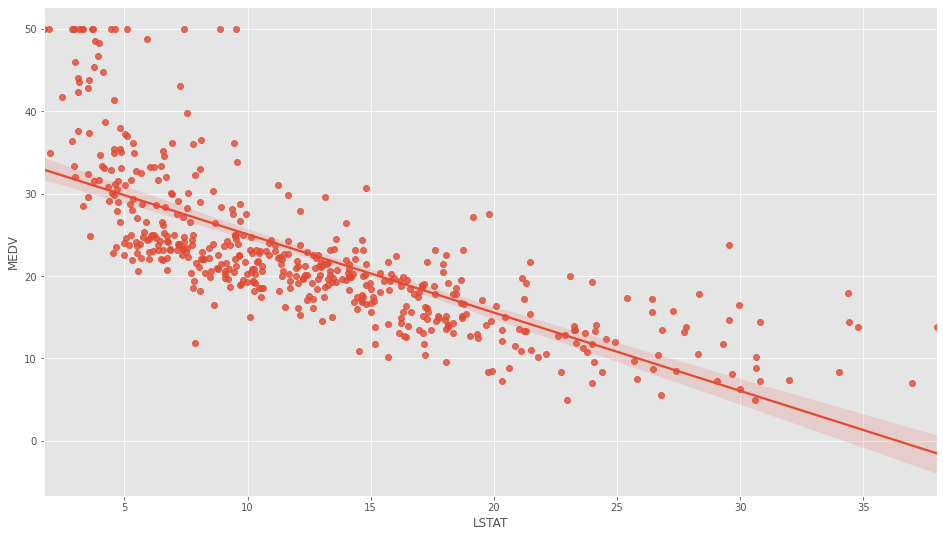

In [ ]:
sns.regplot(x=df["LSTAT"], y=df["MEDV"])

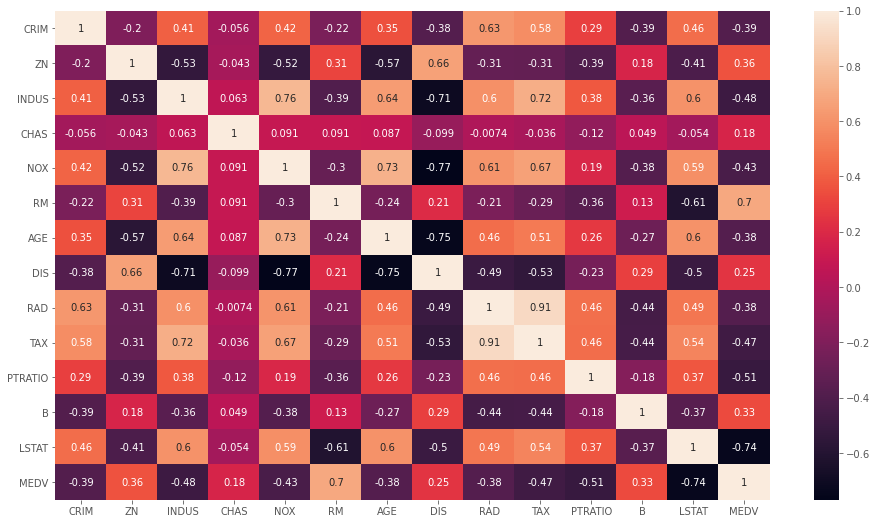

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot = True, yticklabels=corr.columns, xticklabels=corr.columns)

[EN]

Having done the basic linear plots and correlation's heatmap, we can see that there's a strong correlation amid RM, PTRATIO and LSTAT with our target vector. A preliminar observation for our model's feature selection is the following:

* RM-MEDV: The number of rooms per house might be a good indicator of the actual size of the property. 
* PTRATIO-MEDV: There's an inverse correlation, meaning that a low number of students per teacher might imply better education oportunities.
* LSTAT-MEDV: This strong inverse correlation makes sense because a lower per centage of poor household in a neighbohood might increase property value.

[ES]

Habiendo hecho las gráficas lineares básicas y mapa de calor de correlaciones, podemos ver que hay fuertes correlaciones entre RM, PTRATIO Y LSTAT con nuestro vector objetivo. Una observación preliminar para la selección de features de nuestro modelo es la siguiente:

* RM-MEDV: El número de cuartos por casa puede ser un indicador del tamaño real de la propiedad.
* PTRATIO-MEDV: Hay una correlación inversa, significando que un número bajo de estudiantes por maestro implica mejores oportunidades educativas.
* LSTAT-MEDV: Esta fuerte correlación inversa tiene sentido porque un porcentaje bajo de hogares pobres en un vecindario podría incrementar el valor de la propiedad.

# First Model Training

In [ ]:
y = df["MEDV"]
X = df[["RM", "PTRATIO", "LSTAT"]]

print(X.shape)
print(y.shape)

(506, 3)
(506,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state= 48)

In [ ]:
reg = LinearRegression().fit(X_train, y_train)
y_train_predict = reg.predict(X_train)
y_test_predict = reg.predict(X_test)

# First Model Evaluation

(-10.0, 50.0)

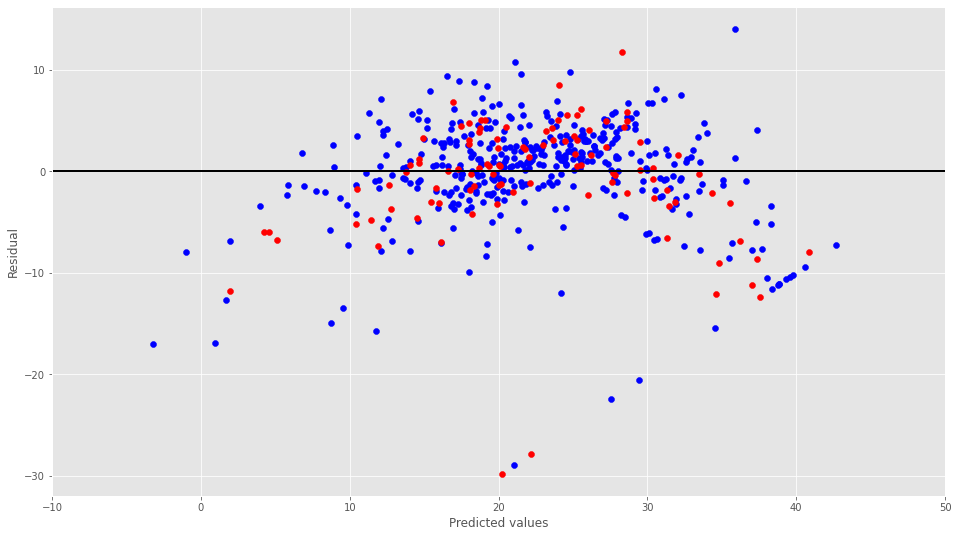

In [ ]:
plt.scatter(y_train_predict,  y_train_predict - y_train,
            c='blue')       
plt.scatter(y_test_predict,  y_test_predict - y_test,
            c='red')
plt.xlabel('Predicted values')
plt.ylabel('Residual')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])

In [ ]:
r2 = r2_score(y_train, y_train_predict)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

print(r2)
print(rmse)

0.6959966341739479
4.96673594766885


[EN]

Making a simple linear regression, we can se that our model over simplify the feature's correlations. This can be an indication of underfitting. While the r2 score is good for a first attempt, we can see that there's high residuals of our predicted values. 

[ES]

Haciendo una regresión linear simple, podemos ver que nuestro modelo sobresimplificó las correlaciones de los features. Esto puede ser una indicación de underfitting. Aunque the score r2 es bueno para un primer inteto, podemos ver que hay residuales altos de nuestros valores predecidos

# Second Model Training

[EN]

For this second iteration, we'll add more features to two models and see what's the result. In the first model (partial) we'll add values with a <.30 correlation value form our heatmap. For the second model (total), we'll add all the features from the dataset.

[ES]

Para esta segunda iteración, vamos a añadir más features a nuestros dos modelos y ver cual es el resultado. En el primer modelo (parcial) vamos a añadir todos los valores con una correlación <.30 de nuestro mapa de calor. Para nuestro segundo modelo (total), vamos a añadir todos los features de nuestro dataset.

In [ ]:
X_partial = df[["CRIM", "ZN", "INDUS", "NOX", "RM", "AGE", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]]
X_total = df[["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]]

print(X_partial.shape)
print(X_total.shape)

(506, 11)
(506, 13)


In [ ]:
X_partial_train, X_partial_test, y_partial_train, y_partial_test = train_test_split( X_partial, y, test_size=0.20, random_state= 48)
X_total_train, X_total_test, y_total_train, y_total_test = train_test_split( X_total, y, test_size=0.20, random_state= 48)

In [ ]:
reg_partial = LinearRegression().fit(X_partial_train, y_partial_train)
y_partial_train_predict = reg_partial.predict(X_partial_train)
y_partial_test_predict = reg_partial.predict(X_partial_test)

reg_total = LinearRegression().fit(X_total_train, y_total_train)
y_total_train_predict = reg_total.predict(X_total_train)
y_total_test_predict = reg_total.predict(X_total_test)

# Second Model Evaluation


(-10.0, 50.0)

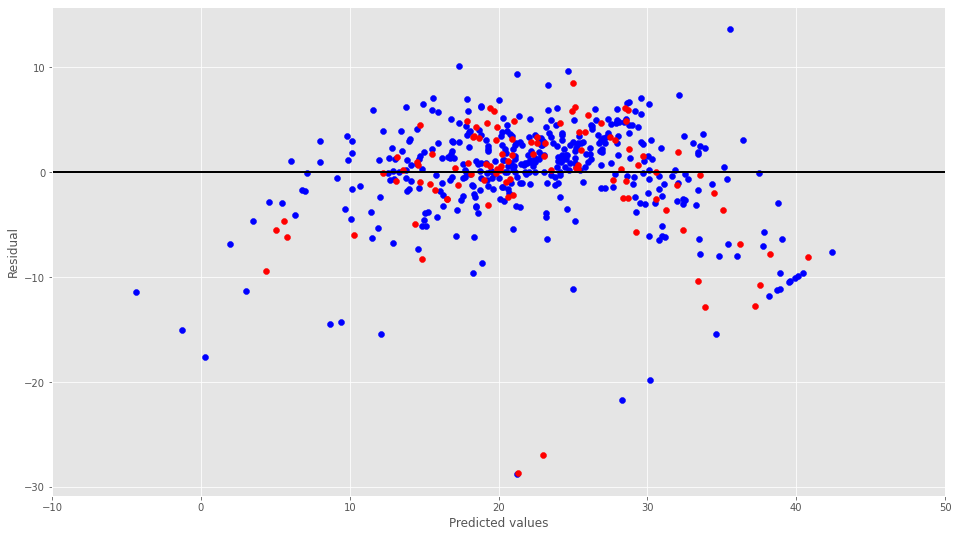

In [ ]:
plt.scatter(y_partial_train_predict,  y_partial_train_predict - y_partial_train,
            c='blue')       
plt.scatter(y_partial_test_predict,  y_partial_test_predict - y_partial_test,
            c='red')
plt.xlabel('Predicted values')
plt.ylabel('Residual')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])

(-10.0, 50.0)

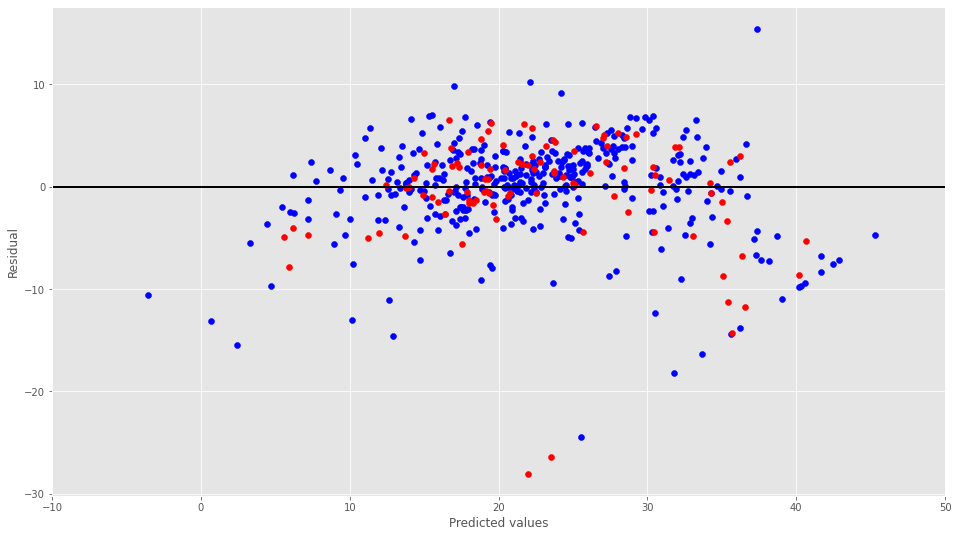

In [ ]:
plt.scatter(y_total_train_predict,  y_total_train_predict - y_total_train,
            c='blue')       
plt.scatter(y_total_test_predict,  y_total_test_predict - y_total_test,
            c='red')
plt.xlabel('Predicted values')
plt.ylabel('Residual')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])

In [ ]:
r2_partial = r2_score(y_partial_train, y_partial_train_predict)
r2_total = r2_score(y_total_train, y_total_train_predict)
rmse_partial = (np.sqrt(mean_squared_error(y_partial_train, y_partial_train_predict)))
rmse_total = (np.sqrt(mean_squared_error(y_total_train, y_total_train_predict)))

print("--Partial Model--")
print(r2_partial)
print(rmse_partial)
print("--Total Model--")
print(r2_total)
print(rmse_total)

--Partial Model--
0.7196429416642336
4.769662207583039
--Total Model--
0.754662892232306
4.461834901168846


[EN]

Even though the scores for both models are better, we're still below our objective. Furthermore, we can't use them because our model might not  generalize well new data due to overfitting.

[ES]

Aunque los scores de ambos modelos son mejores, seguimos debajo de nuestro objetivo. Además, no podemos usar este modelo ya que podría no generalizar bien por overfitting.

# Principal Components Analysis

[EN]

Because the basic EDA didn't showed us variables that can help us to improve our score, we're going to apply PCA to identify how many features we might need to properly train our model.

[ES]

Porque el EDA no nos mostró variables que nos ayuden a mejorar nuestro score, aplicaremos PCA para identificar cuantas features podríamos necesitar para entrenar correctamente nuestro modelo.

In [ ]:
scaler = StandardScaler()
normal_df = df.drop(["MEDV"], axis=1) 
scaler.fit(normal_df) 
X_scaled = scaler.transform(normal_df)

In [ ]:
pca = PCA(n_components=13) 
pca.fit(X_scaled) 
X_pca = pca.transform(X_scaled)
expl = pca.explained_variance_ratio_

print(X_pca.shape)
print(expl)

(506, 13)
[0.47129606 0.11025193 0.0955859  0.06596732 0.06421661 0.05056978
 0.04118124 0.03046902 0.02130333 0.01694137 0.0143088  0.01302331
 0.00488533]


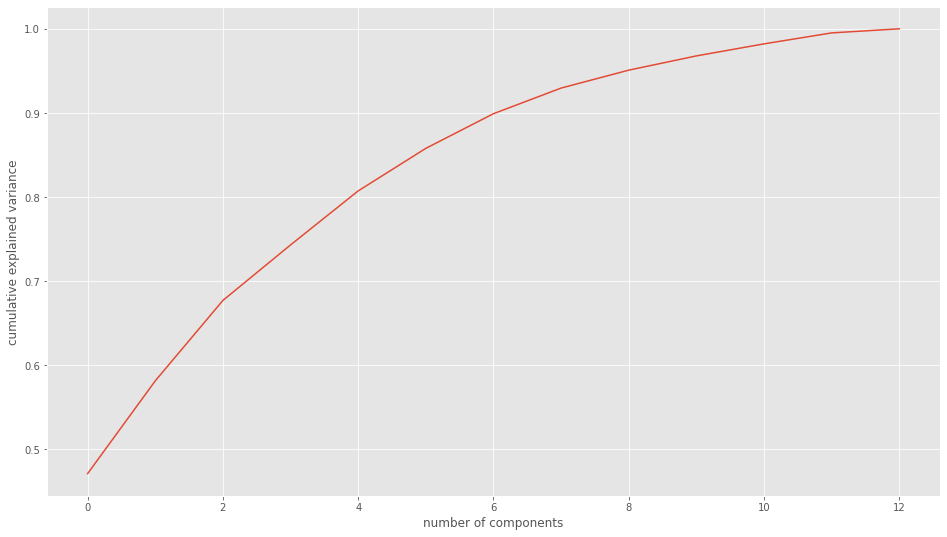

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")
plt.show()

[EN]

We can see that 4 components help us to explain +80% of the cumulative variance of our data. 

[ES]

Podemos ver que 4 componentes nos ayudan a explicar +80% de la varianza acumulada de nuestros datos. 

# Third Model Training

[EN]

Once we defined that we need 4 features for our model, we're going to use a Random Forest Regressor algorithm in order to ensamble various regressor trees. In this sense, the max_depth hyperparameter will be set on 4 in order to avoid high bias and variance.

[ES]

Habiendo definido que necesitamos 4 features para nuestro modelo, vamos a usar un algoritmo de Random Forest Regressor para ensamblar varios árboles de decisión. En este sentido, el hiperparámetro max_depth será puesto en 4 para evitar sesgos y varianzas altas.

In [ ]:
X = df[["INDUS", "RM", "PTRATIO", "LSTAT"]]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state= 48)

In [ ]:
reg = RandomForestRegressor(max_depth=4)
reg.fit(X_train, y_train)

y_train_predict = reg.predict(X_train)
y_test_predict = reg.predict(X_test)

# Third Model Evaluation

(-10.0, 50.0)

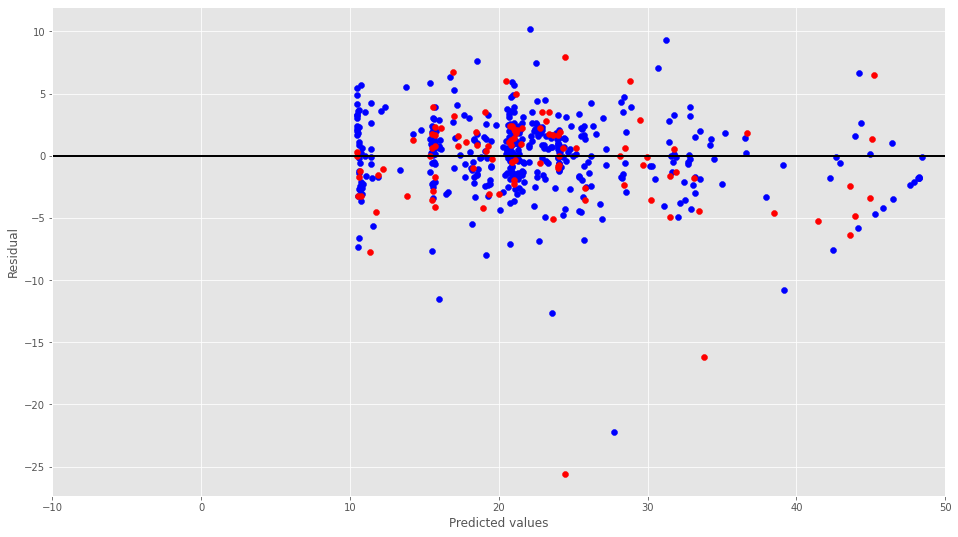

In [ ]:
plt.scatter(y_train_predict,  y_train_predict - y_train,
            c='blue')       
plt.scatter(y_test_predict,  y_test_predict - y_test,
            c='red')
plt.xlabel('Predicted values')
plt.ylabel('Residual')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])

In [ ]:
r2 = r2_score(y_train, y_train_predict)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

print(r2)
print(rmse)

0.8829355872064015
3.0820829374748966


[EN]

In this case, we obtained a 88% score. Although a deeper analysis can be used to verify that we're not overfitting our mode, we've achieved our objective. That is to say, this model predicts properly close to 9 of 10 cases.

[ES]

En este caso, hemos obtenido un score de 88%. Aunque un análisis más profundo se puede usar para verificar que no hayamos caido en overfitting, de momento podemos decir que hemos alcanzado el objetivo de este ejercicio. Es decir, este modelo predice adecuadamente cerca de 9 de cada 10 casos. 

# Final Test and Conclusions

[EN]

This particular case-study is challenging because it comes with multiple columns to analyze. While there are some obvious correlations amid vectors, is wise to dig deeper and try to see beyond that. The PCA was useful to understand how variables were interacting among each other. 

Furthermore, we learned that a simple linear regression won't be enough to adequately calculate housing pricing because there are a number of non-obvious patterns among variables.

We finish this exercise by building a matrix with fictional households in order to analyze what value our model predicts. 

[ES]

Este caso de estudio en particular es retador porque viene con varias columnas por analizar. Mientras hay correlaciones obvias entre vectores, es sabio profundizar y tratar de ver más allá de eso. El PCA fue útil para entender como las variables interactuaban entre ellas. 

Además, aprendimos que una regresión lineal simple no es suficiente para calcular adecuadamente los precios de vivienda porque hay varios patrones no obvios entre variables. 

Terminamos este ejercicio construyendo una matriz con casas ficticias para analizar que valor predice nuestro modelo.

In [ ]:
testing_data = [[1, 4, 22, 37],
               [11, 6, 18, 12], 
               [27, 8, 12, 2],
                [18, 5, 15, 20],
                [24, 4, 13, 30]]  

In [ ]:
for i, price in enumerate(reg.predict(testing_data)):
    print("Predicted value of household No. {}: ${:,.2f}".format(i+1, price * 10000))

Predicted value of household No. 1: $110,791.65
Predicted value of household No. 2: $210,010.23
Predicted value of household No. 3: $473,548.67
Predicted value of household No. 4: $168,543.81
Predicted value of household No. 5: $156,880.43
